<a href="https://colab.research.google.com/github/NikitaMarnykh/women_of_Pima_Indian_descent/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D0%B6%D0%B5%D0%BD%D1%89%D0%B8%D0%BD%D1%8B_%D0%BF%D0%B8%D0%BC%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Постановка задачи и описание датасета

Предоставлена выборка пациентов: женщин старше 21 года индейского происхождения Пима.

Информация, содержащаяся в датасете:

* Pregnancies - количество беременностей

* Glucose - концентрация глюкозы в плазме через 2 ч на толерантность к глюкозе

* BloodPressure - диастолическое артериальное давление (мм рт.ст.)

* SkinThickness - толщина кожной складки трицепса (мм)

* Insulin - 2-часовой сывороточный инсулин (мкЕд/мл)

* BMI - индекс массы тела (вес в кг/(рост в м)^2)

* DiabetesPedigreeFunction - функция родословной диабета

* Age – возраст

* Outcome - результат наличия заболевания (диабета): 0 - не выявлен, 1 - выявлен

Исходные данные:

Датасет с женщинами (файл в формате csv по ссылке:
https://docs.google.com/spreadsheets/d/1hPvkRS9NhZM2zTge9ryp_Lq7jG7DxmSnBfSPOsMaWPQ/edi
t?usp=drive_link).

## 2. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install missingno

Подключаем все необходимые зависимости

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno

Подгружаем репозиторий для работы с ним

In [3]:
!git clone https://github.com/NikitaMarnykh/women_of_Pima_Indian_descent


Cloning into 'women_of_Pima_Indian_descent'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 9.70 KiB | 1.38 MiB/s, done.


Перейдём в установленный репозиторий

In [4]:
%cd women_of_Pima_Indian_descent/

/content/women_of_Pima_Indian_descent


## 3. Первичный обзор датасета. Оценка размеров датасета, наличия дубликатов и пропусков

Сохраняем датасет в переменную

In [498]:
dataset = pd.read_csv('diabetes.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True)

Проведём обзор содержимого таблицы

In [499]:
dataset.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Оценим размеры датасета

In [500]:
dataset.shape

(768, 9)

Оценим наличие полных дубликатов в датасете

In [501]:
dataset.duplicated(keep=False).sum()

np.int64(0)

Оценим наличие пропущенных значений в датасете

In [502]:

dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Визуализируем пропуски

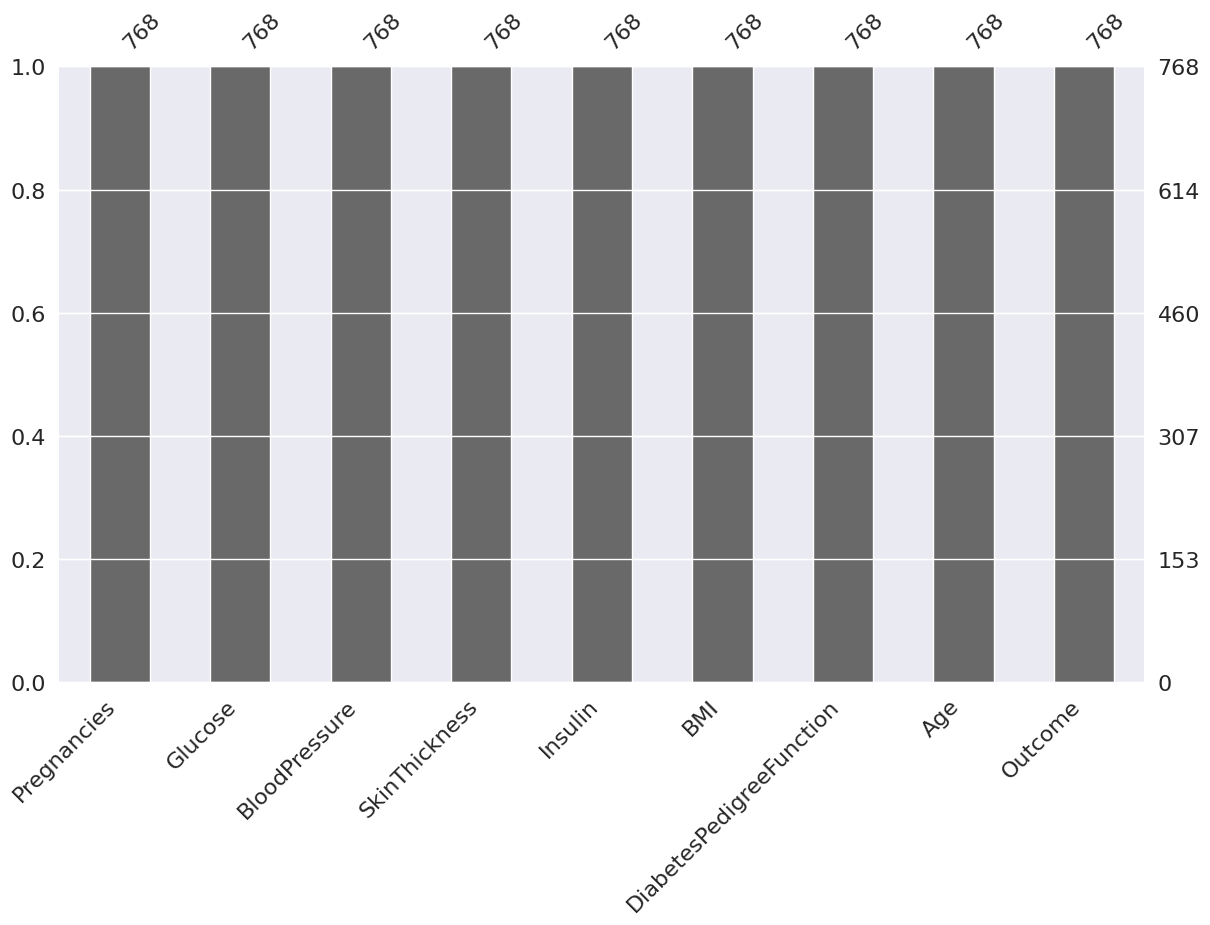

In [503]:
sns.set()
msno.bar(dataset, figsize=(14, 8))
plt.show()

Просмотрим информацию о датасете

In [504]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по предварительному осмотру:

  * О размерах датасета:

      - 768 строк (наблюдений), 9 столбцов (признаков)

  * О типах данных:

    - Количественные признаки:

      * Pregnancies

      * Glucose

      * BloodPressure

      * SkinThickness

      * Insulin

      * BMI

      * DiabetesPedigreeFunction

      * Age

    - Категориальные признаки:

      * Outcome

  * О дубликатах:

    - Полные дубликаты отсутствуют

  * О пропущенных значениях:

    - В признаках пропусков нет.

## 4. Предобработка данных

Функция для заполнения нулей соответствующей медианой группы

In [415]:
def fill_with_group_median(row: pd.Series, group_column: str, sign: str) -> float:
    """
    Заполняет нулевые значения в целевом признаке медианным значением для соответствующей группы.

    :param row: строка DataFrame, содержащая значения признаков пациента
    :param group_column: название колонки для группировки
    :param sign: название целевого признака
    :returns: исходное значение целевого признака, если оно не нулевое, либо медианное значение
              для соответствующей группы, либо общая медиана в качестве резервного значения
    """

    # Проверяем, является ли значение целевого признака нулевым (пропущенным)
    if row[sign] == 0:
        # Пытаемся взять медиану для конкретной группы
        median_for_group = group_median_dict.get(row[group_column])

        if median_for_group is not None:
            # Возвращаем медиану для конкретной группы, если статистика доступна
            return median_for_group
        else:
            # Если для этой группы нет статистик, используем общую медиану
            return overall_median
    else:
        # Возвращаем исходное значение, если оно не нулевое
        return row[sign]

### 4.1 Признак Pregnancies

Запишем имя признака в переменную sign

In [505]:
sign = 'Pregnancies'

Выведем признак для просмотра содержимого

In [506]:
dataset[sign].head(10)

,Pregnancies
0,6
1,1
2,8
3,1
4,0
5,5
6,3
7,10
8,2
9,8


Выведем уникальные значения

In [507]:
dataset[sign].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

Выведем количество уникальных значений

In [508]:
dataset[sign].unique().shape

(17,)

Посмотрим наличие дубликатов

In [509]:
dataset.duplicated(subset=sign).sum()

np.int64(751)

Построим графически на пропущенные значения

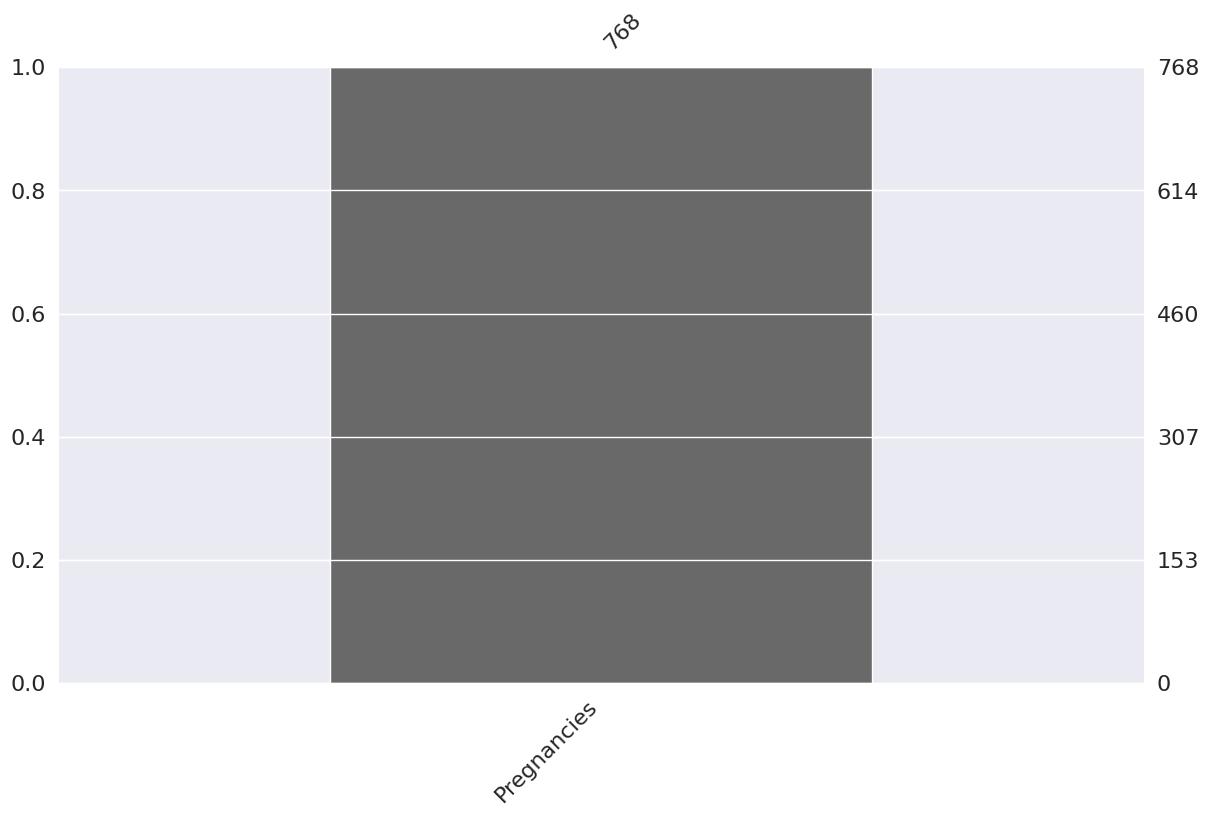

In [510]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [511]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.2 Признак Age

Запишем имя признака в переменную sign

In [435]:
sign = 'Age'

Выведем признак для просмотра содержимого

In [436]:
dataset[sign].head(10)

,Age
0,50
1,31
2,32
3,21
4,33
5,30
6,26
7,29
8,53
9,54


Выведем уникальные значения

In [437]:
dataset[sign].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

Выведем количество уникальных значений

In [438]:
dataset[sign].unique().shape

(52,)

Посмотрим наличие дубликатов

In [439]:
dataset.duplicated(subset=sign).sum()

np.int64(716)

Построим графически на пропущенные значения

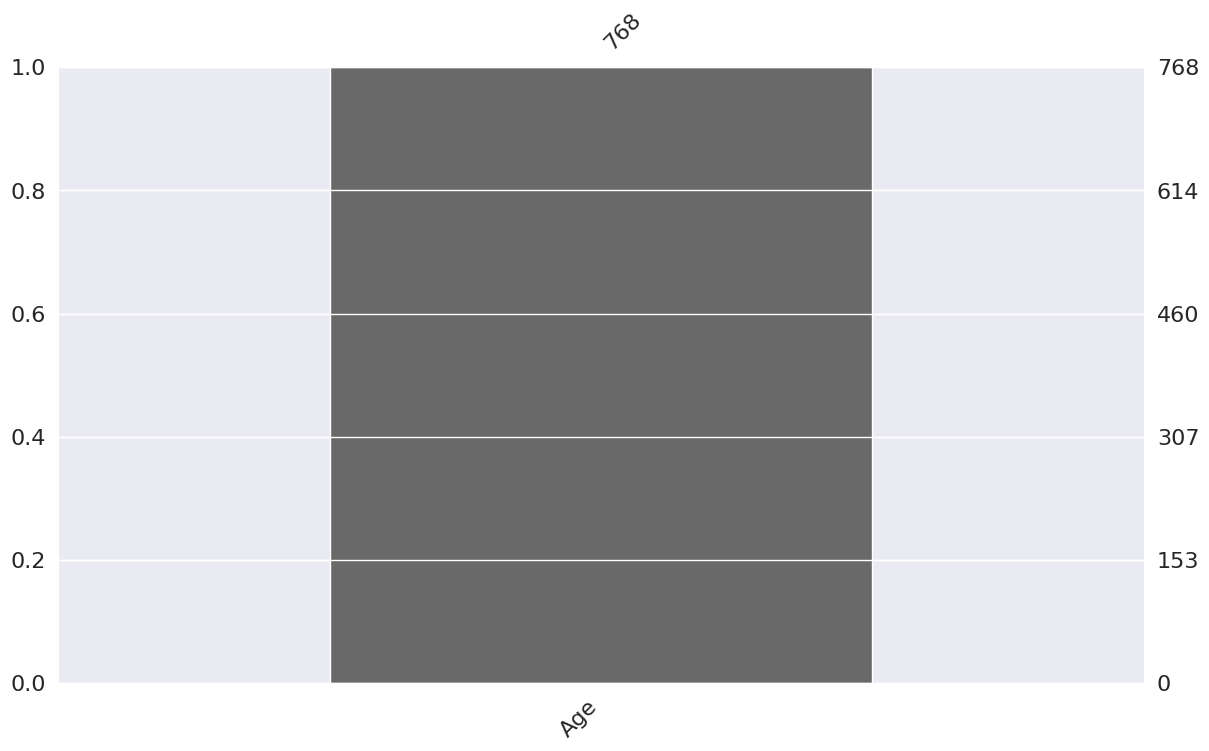

In [440]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [441]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.2 Признак Glucose

Запишем имя признака в переменную sign

In [512]:
sign = 'Glucose'

Выведем признак для просмотра содержимого

In [513]:
dataset[sign].head(10)

,Glucose
0,148
1,85
2,183
3,89
4,137
5,116
6,78
7,115
8,197
9,125


Выведем уникальные значения

In [514]:
dataset[sign].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

Выведем количество уникальных значений

In [515]:
dataset[sign].unique().shape

(136,)

Посмотрим наличие дубликатов

In [516]:
dataset.duplicated(subset=sign).sum()

np.int64(632)

Построим графически на пропущенные значения

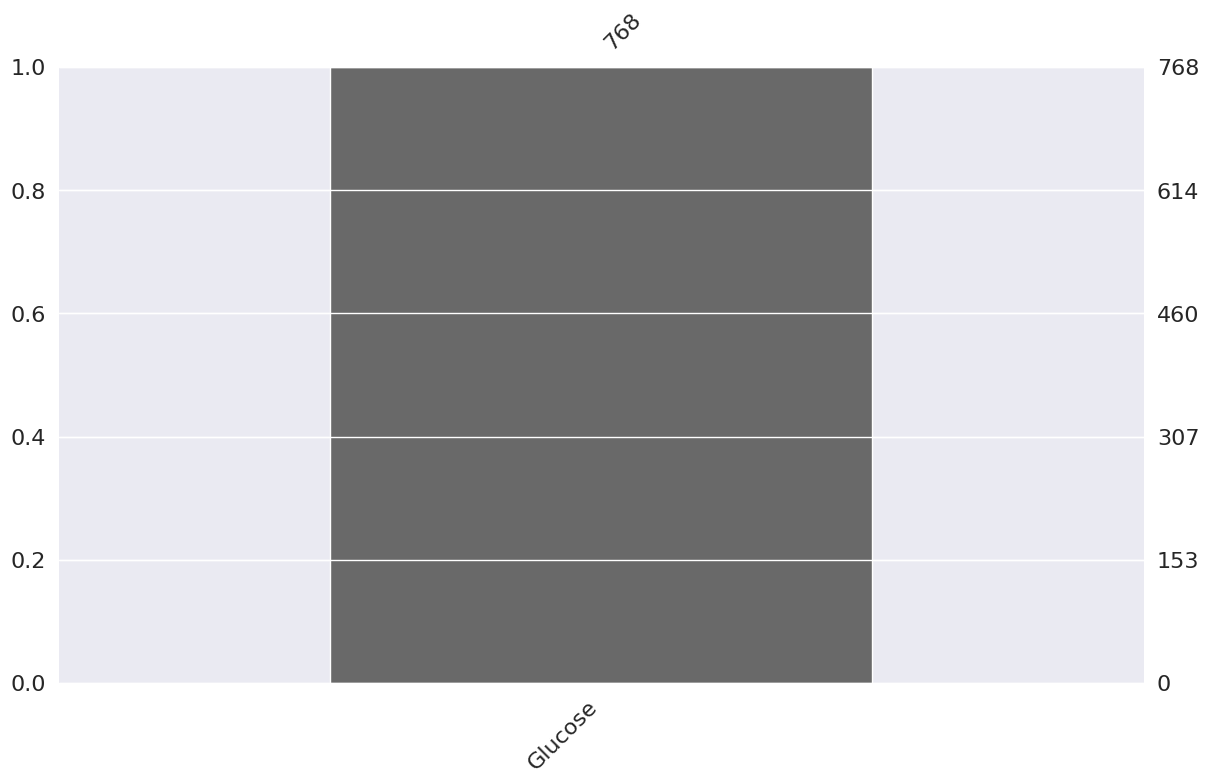

In [517]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим на нулевые значения

In [518]:
dataset[dataset[sign] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Посмотрим на количество нулевых значений

In [519]:
dataset[dataset[sign] == 0].shape

(5, 9)

Для каждого наблюдения найдём медианное, среднее, минимальное, максимальное значения и количество наблюдений по нему

In [520]:
statistics = dataset[dataset[sign] != 0][sign].agg(['median', 'mean', 'min', 'max', 'count'])
statistics

,Glucose
median,117.000000
mean,121.686763
min,44.000000
max,199.000000
count,763.000000


Заменим нулевые значения на медианные

In [521]:
dataset.loc[dataset[sign] == 0, sign] = statistics.loc[('median')]

Убедимся в отсутвии нулевых значений

In [522]:
dataset[dataset[sign] == 0].shape

(0, 9)

In [ ]:
bins = [0, 70, 140, np.inf]
labels = ['Hypoglicemia', 'Normal', 'HyperGlicemia']

Посмотрим информациб о датасете

In [523]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии были найдены

  - После обработки количество признаков и наблюдений не изменилось

  - Нулевые значения были заменены на медианные

### 4.3 Признак Insulin

Запишем имя признака в переменную sign

In [524]:
sign = 'Insulin'

Выведем признак для просмотра содержимого

In [525]:
dataset[sign].head(10)

,Insulin
0,0
1,0
2,0
3,94
4,168
5,0
6,88
7,0
8,543
9,0


Выведем уникальные значения

In [526]:
dataset[sign].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

Выведем количество уникальных значений

In [527]:
dataset[sign].unique().shape

(186,)

Посмотрим наличие дубликатов

In [528]:
dataset.duplicated(subset=sign).sum()

np.int64(582)

Построим графически на пропущенные значения

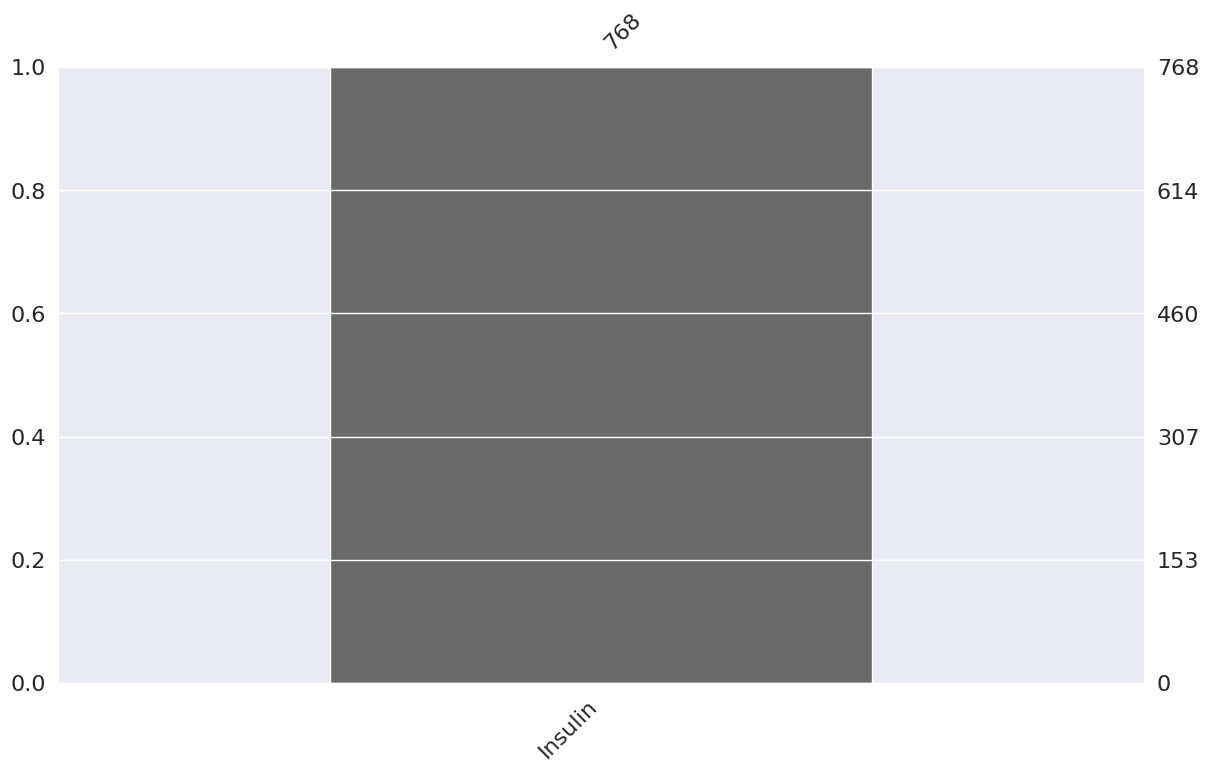

In [529]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим на количество нулевых значений

In [530]:
dataset[dataset[sign] == 0].shape

(374, 9)

Для каждого группы найдём медианное, среднее, минимальное, максимальное значения и количество наблюдений по нему

In [532]:
group_column = ("Glucose", "Age")
statistics = dataset[dataset[sign] != 0].groupby([group_column)[sign].agg(['median', 'mean', 'min', 'max', 'count'])
statistics

KeyError: ('Glucose', 'Age')

Создадим словарь и общую медиану на случай отсутствия группы в статистиках

In [491]:
group_median_dict = statistics['median'].to_dict()
overall_median = dataset[dataset[sign] != 0][sign].median()

Применяем функцию заполнения к dataset

In [495]:
dataset[sign] = dataset.apply(
    lambda x: fill_with_group_median(x, group_column, sign),
    axis=1
)

Убедимся в отсутвии нулевых значений

In [496]:
dataset[dataset[sign] == 0].shape

(0, 9)

Посмотрим информацию о датасете

In [497]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии были найдены

  - После обработки количество признаков и наблюдений не изменилось

  - Нулевые значения были заменены на медианные в разрезе признака Glucose

### 4.5 Признак BloodPressure

Запишем имя признака в переменную sign

In [442]:
sign = 'BloodPressure'

Выведем признак для просмотра содержимого

In [443]:
dataset[sign].head(10)

,BloodPressure
0,72
1,66
2,64
3,66
4,40
5,74
6,50
7,0
8,70
9,96


Выведем уникальные значения

In [444]:
dataset[sign].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

Выведем количество уникальных значений

In [445]:
dataset[sign].unique().shape

(47,)

Посмотрим наличие дубликатов

In [446]:
dataset.duplicated(subset=sign).sum()

np.int64(721)

Построим графически на пропущенные значения

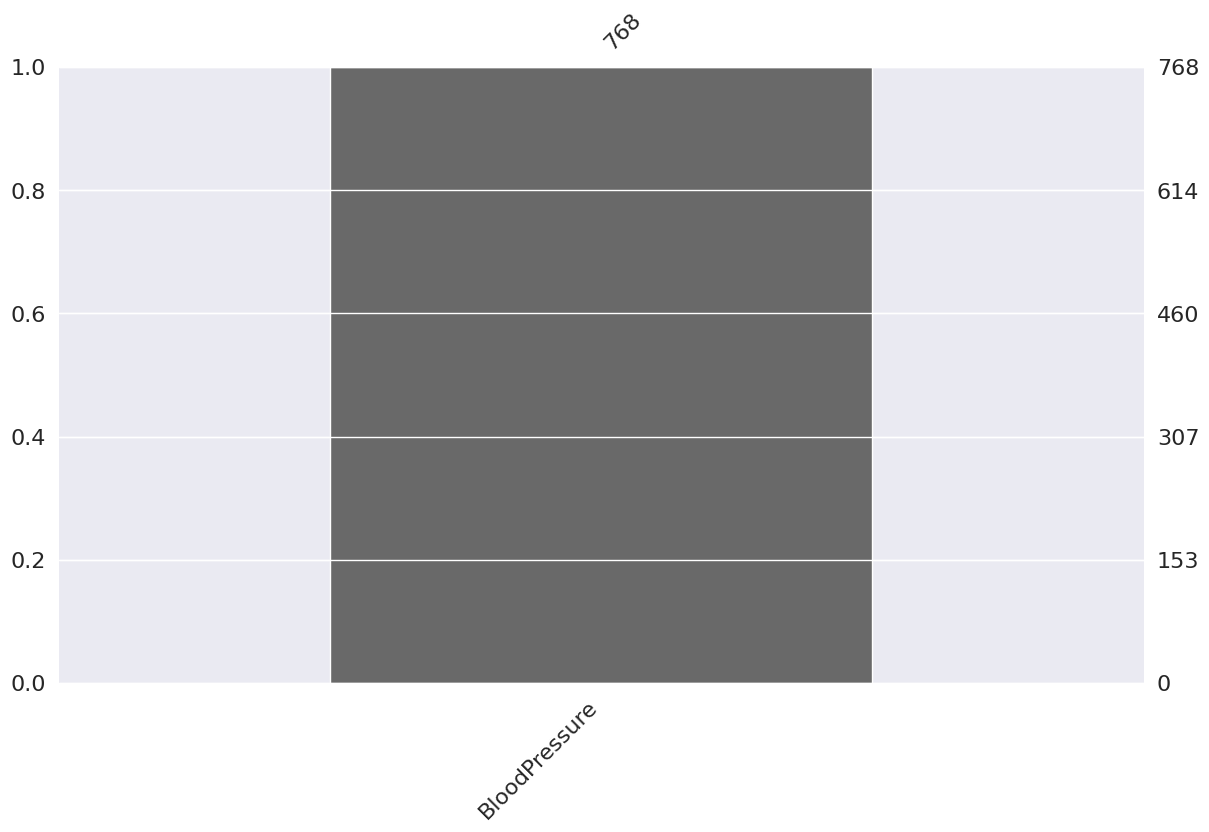

In [447]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим на нулевые значения

In [448]:
dataset[dataset[sign] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


Посмотрим на количество нулевых значений

In [449]:
dataset[dataset[sign] == 0].shape

(35, 9)

Для каждого группы найдём медианное, среднее, минимальное, максимальное значения и количество наблюдений по нему

In [450]:
group_column = "Age"
statistics = dataset[dataset[sign] != 0].groupby(group_column)[sign].agg(['median', 'mean', 'min', 'max', 'count'])
statistics

,median,mean,min,max,count
Age,,,,,
21,64.0,67.000000,24,96,62
22,66.0,66.492754,44,100,69
23,68.0,69.828571,50,90,35
24,68.0,67.909091,48,88,44
25,65.0,65.090909,44,90,44
26,68.0,68.322581,30,110,31
27,74.0,75.870968,54,122,31
28,72.0,72.454545,50,98,33
29,75.0,73.296296,50,90,27


Создадим словарь и общую медиану на случай отсутствия группы в статистиках

In [451]:
group_median_dict = statistics['median'].to_dict()
overall_median = dataset[dataset[sign] != 0][sign].median()

Применяем функцию заполнения к dataset

In [452]:
dataset[sign] = dataset.apply(
    lambda x: fill_with_group_median(x, group_column, sign),
    axis=1
)

Убедимся в отсутвии нулевых значений

In [453]:
dataset[dataset[sign] == 0].shape

(0, 9)

Посмотрим информациб о датасете

In [454]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии были найдены

  - После обработки количество признаков и наблюдений не изменилось

  - Нулевые значения были заменены на медианные в разрезе признака Age

### 4.6 Признак BMI

Запишем имя признака в переменную sign

In [455]:
sign = 'BMI'

Выведем признак для просмотра содержимого

In [456]:
dataset[sign].head(10)

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
5,25.6
6,31.0
7,35.3
8,30.5
9,0.0


Выведем уникальные значения

In [457]:
dataset[sign].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

Выведем количество уникальных значений

In [458]:
dataset[sign].unique().shape

(248,)

Посмотрим наличие дубликатов

In [459]:
dataset.duplicated(subset=sign).sum()

np.int64(520)

Построим графически на пропущенные значения

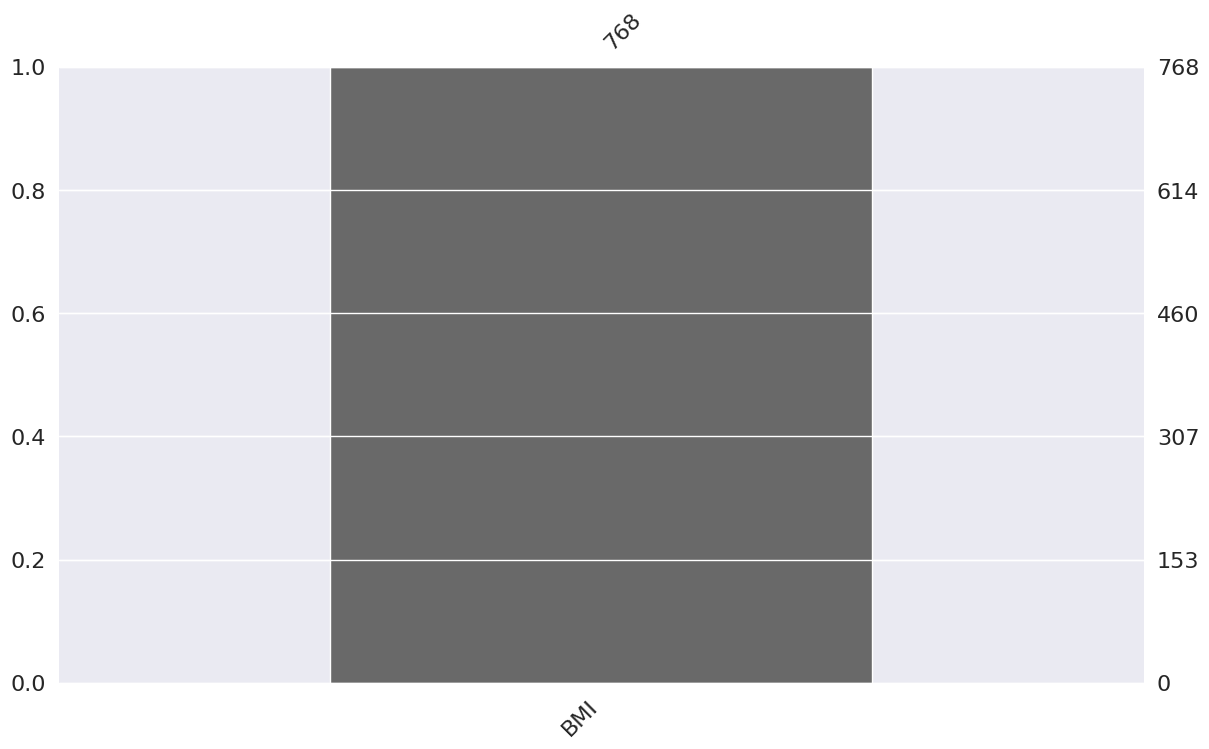

In [460]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим на нулевые значения

In [461]:
dataset[dataset[sign] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96.0,0,0,0.0,0.232,54,1
49,7,105,68.0,0,0,0.0,0.305,24,0
60,2,84,64.0,0,0,0.0,0.304,21,0
81,2,74,66.0,0,0,0.0,0.102,22,0
145,0,102,75.0,23,0,0.0,0.572,21,0
371,0,118,64.0,23,89,0.0,1.731,21,0
426,0,94,65.0,0,0,0.0,0.256,25,0
494,3,80,66.0,0,0,0.0,0.174,22,0
522,6,114,68.0,0,0,0.0,0.189,26,0
684,5,136,82.0,0,0,0.0,0.640,69,0


Посмотрим на количество нулевых значений

In [462]:
dataset[dataset[sign] == 0].shape

(11, 9)

Для каждой вида диагноза найдём медианную, среднюю, минимальную, максимальную зарплаты и количество наблюдений по нему

In [463]:
group_column = "Age"
statistics = dataset[dataset[sign] != 0].groupby(group_column)[sign].agg(['median', 'mean', 'min', 'max', 'count']).round(2)
statistics

,median,mean,min,max,count
Age,,,,,
21,27.75,29.21,18.2,43.5,60
22,28.85,30.35,19.4,57.3,70
23,30.25,31.50,20.1,52.3,38
24,33.20,33.29,22.3,45.3,45
25,33.20,32.62,19.5,59.4,47
26,35.25,36.01,20.8,67.1,32
27,31.15,31.95,18.2,49.3,32
28,34.50,33.64,19.5,52.9,35
29,32.00,33.54,24.3,45.6,29


Создадим словарь и общую медиану на случай отсутствия возраста в статистиках

In [464]:
group_median_dict = statistics['median'].to_dict()
overall_median = dataset[dataset[sign] != 0][sign].median()

Применяем функцию заполнения к dataset

In [465]:
dataset[sign] = dataset.apply(
    lambda x: fill_with_group_median(x, group_column, sign),
    axis=1
)

Убедимся в отсутвии нулевых значений

In [466]:
dataset[dataset[sign] == 0].shape

(0, 9)

Посмотрим информациб о датасете

In [467]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии были найдены

  - После обработки количество признаков и наблюдений не изменилось

  - Нулевые значения были заменены на медианные в разрезе признака Age

### 4.7 Признак SkinThickness

Запишем имя признака в переменную sign

In [468]:
sign = 'SkinThickness'

Выведем признак для просмотра содержимого

In [469]:
dataset[sign].head(10)

,SkinThickness
0,35
1,29
2,0
3,23
4,35
5,0
6,32
7,0
8,45
9,0


Выведем уникальные значения

In [470]:
dataset[sign].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

Выведем количество уникальных значений

In [471]:
dataset[sign].unique().shape

(51,)

Посмотрим наличие дубликатов

In [472]:
dataset.duplicated(subset=sign).sum()

np.int64(717)

Построим графически на пропущенные значения

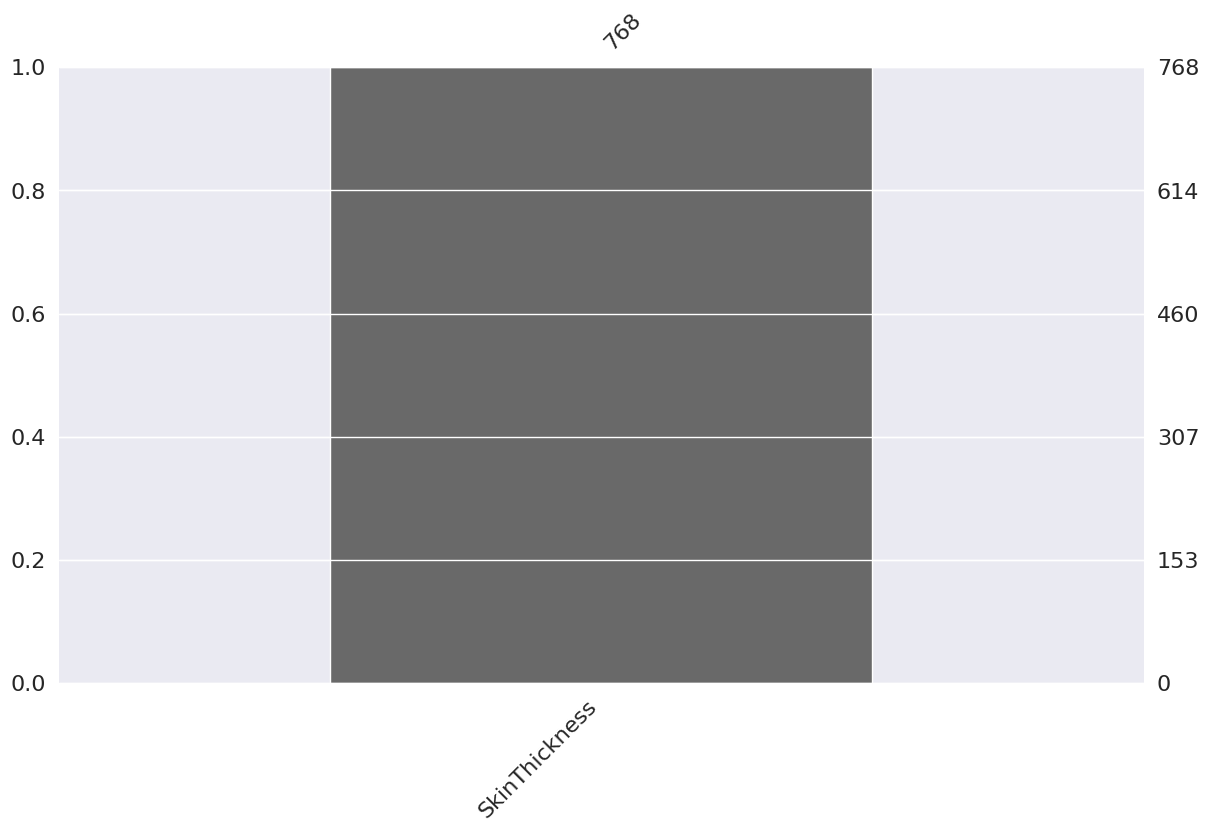

In [473]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим на нулевые значения

In [474]:
dataset[dataset[sign] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64.0,0,0,23.3,0.672,32,1
5,5,116,74.0,0,0,25.6,0.201,30,0
7,10,115,75.0,0,0,35.3,0.134,29,0
9,8,125,96.0,0,0,35.2,0.232,54,1
10,4,110,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72.0,0,0,36.3,0.258,52,1
758,1,106,76.0,0,0,37.5,0.197,26,0
759,6,190,92.0,0,0,35.5,0.278,66,1
762,9,89,62.0,0,0,22.5,0.142,33,0


Посмотрим на количество нулевых значений

In [475]:
dataset[dataset[sign] == 0].shape

(227, 9)

Для каждой вида диагноза найдём медианную, среднюю, минимальную, максимальную зарплаты и количество наблюдений по нему

In [476]:
group_column = "BMI"
statistics = dataset[dataset[sign] != 0].groupby(group_column)[sign].agg(['median', 'mean', 'min', 'max', 'count']).round(2)
statistics

,median,mean,min,max,count
BMI,,,,,
18.2,17.0,17.0,15,19,2
19.3,11.0,11.0,11,11,1
19.4,11.0,11.0,11,11,1
19.5,18.5,18.5,12,25,2
19.6,10.0,10.0,7,13,2
...,...,...,...,...,...
53.2,56.0,56.0,56,56,1
55.0,42.0,42.0,42,42,1
57.3,35.0,35.0,35,35,1


Создадим словарь и общую медиану на случай отсутствия группы в статистиках

In [477]:
group_median_dict = statistics['median'].to_dict()
overall_median = dataset[dataset[sign] != 0][sign].median()

Применяем функцию заполнения к dataset

In [478]:
dataset[sign] = dataset.apply(
    lambda x: fill_with_group_median(x, group_column, sign),
    axis=1
)

Убедимся в отсутвии нулевых значений

In [479]:
dataset[dataset[sign] == 0].shape

(0, 9)

Посмотрим информациб о датасете

In [480]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии были найдены

  - После обработки количество признаков и наблюдений не изменилось

  - Нулевые значения были заменены на медианные в разрезе признака BMI

### 4.8 Признак DiabetesPedigreeFunction

Запишем имя признака в переменную sign

In [ ]:
sign = 'DiabetesPedigreeFunction'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,DiabetesPedigreeFunction
0,0.627
1,0.351
2,0.672
3,0.167
4,2.288
5,0.201
6,0.248
7,0.134
8,0.158
9,0.232


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(517,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(251)

Построим графически на пропущенные значения

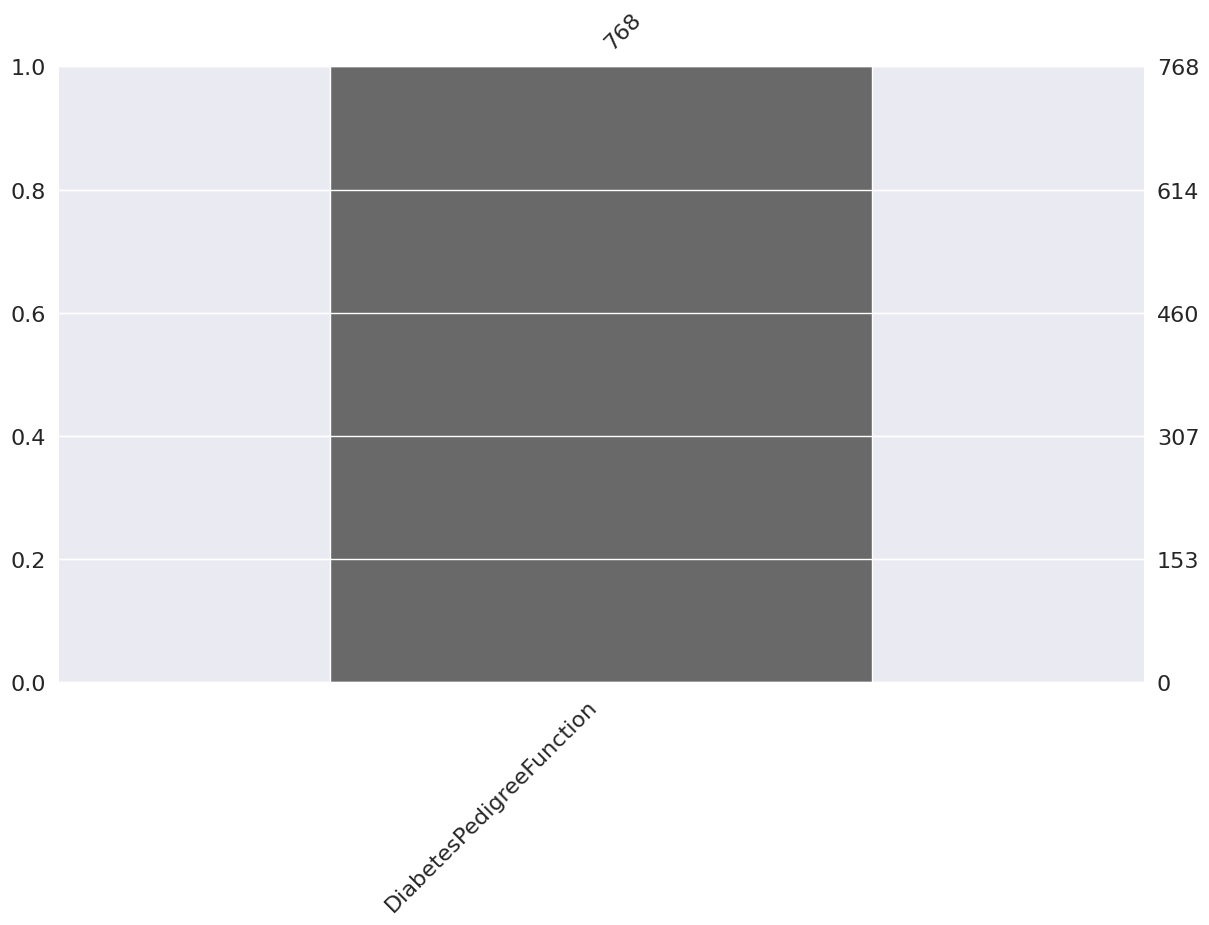

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии не были найдены

  - После обработки количество признаков и наблюдений не изменилось

### 4.9 Признак Outcome





Запишем имя признака в переменную sign

In [ ]:
sign = 'Outcome'

Выведем признак для просмотра содержимого

In [ ]:
dataset[sign].head(10)

,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


Выведем уникальные значения

In [ ]:
dataset[sign].unique()

array([1, 0])

Выведем количество уникальных значений

In [ ]:
dataset[sign].unique().shape

(2,)

Посмотрим наличие дубликатов

In [ ]:
dataset.duplicated(subset=sign).sum()

np.int64(766)

Построим графически на пропущенные значения

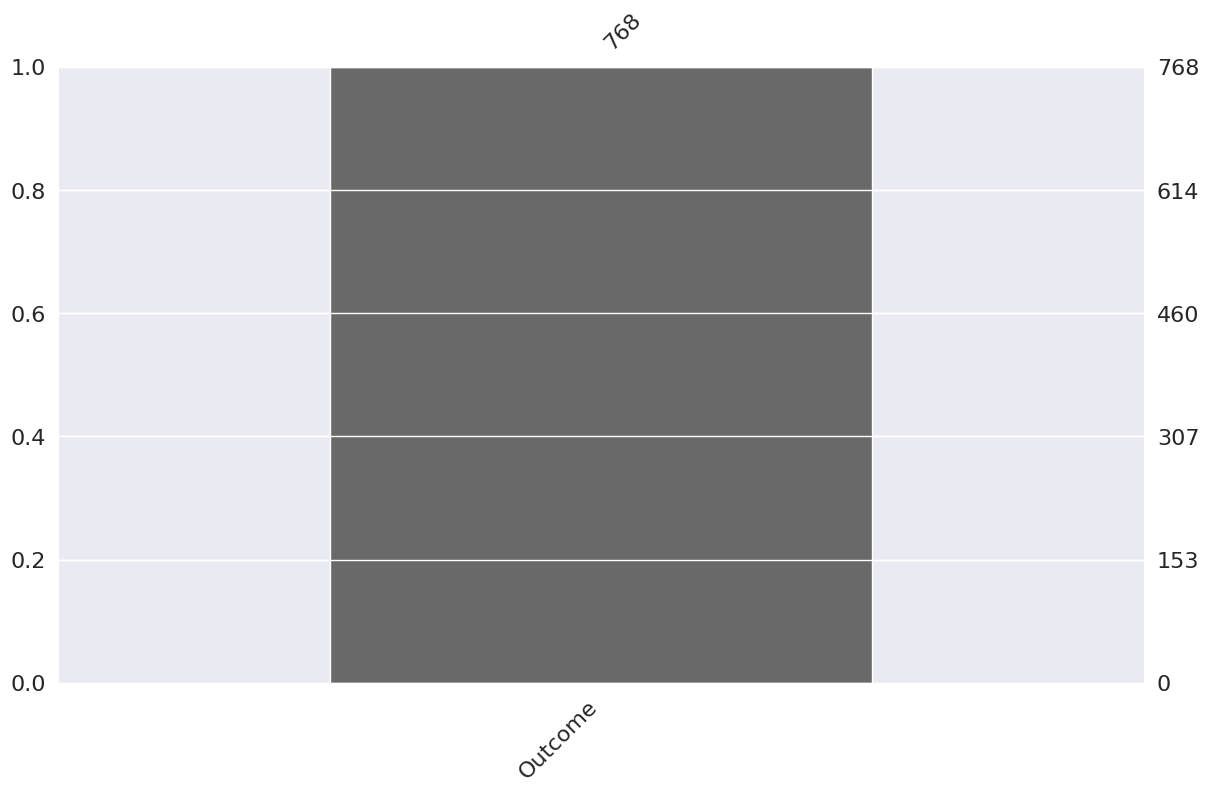

In [ ]:
sns.set()
msno.bar(dataset[[sign]], figsize=(14, 8))
plt.show()

Посмотрим информациб о датасете

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выводы по обработке признака:

  - Аномалии не были найдены
  
  - После обработки количество признаков и наблюдений не изменилось